**1. 다음 코드를 실행하면 좌측의  히스토그램을 얻는다. 오른쪽 히스트그램이 나오도록 코드를 수정하시오.**
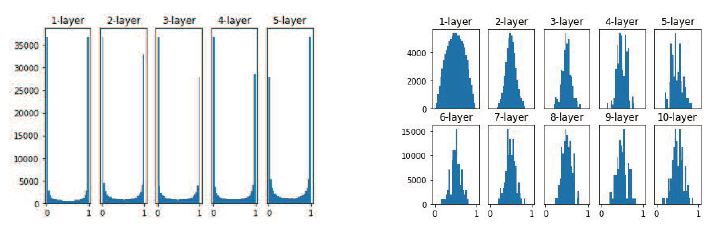

10층이므로 `hidden_layer_size = 10`으로 변경합니다.  
Xavier 초기값을 따르도록 `w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)`으로 변경합니다.  
2$\times$5 바둑판에 그리도록 `plt.subplot(2, 5, i+1)`으로 변경합니다.  
i=0,5일때만 y축 눈금이 표시되도록 `if i %5 != 0: plt.yticks([], [])`으로 변경합니다.  
i=0,1,2,3,4일때만 x축 눈금이 표시되도록 `if i< 5: plt.xticks([], [])`으로 변경합니다.

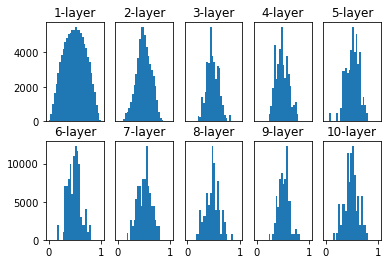

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 10
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(2, 5, i+1)
    plt.title(str(i+1) + "-layer")
    if i %5 != 0: plt.yticks([], [])
    if i< 5: plt.xticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


**2. 뉴런의 개수가 각각 784, 400, 300, 200, 100, 10인 5층 신경망을 생각하자. 각 $k=1,2,3,4,5$에 대하여 $k-1$층에서 $k$층으로 가는 Affine 변환의 가중치 행렬을 $W_k$라 하자.  
(i) 활성화 함수(activation function)를 sigmoid함수로 잡고 gradient vanishing이나 표현력 제한이 일어나지 않도록 Xavier 초기값을 따라 초기값을 설정하려 한다. 초기 가중치 행렬 $W_1,W_2,W_3,W_4,W_5$를 각각 어떤 분포를 따라 랜덤하게 선택해야 하겠는가?**

$W_1 \sim N(0,{1 \over 784})$, $W_2 \sim N(0,{1 \over 400})$, $W_3 \sim N(0,{1 \over 300})$, $W_4 \sim N(0,{1 \over 200})$, $W_5 \sim N(0,{1 \over 100})$

**(ii) 활성화 함수(activation function)를 ReLU함수로 잡고 gradient vanishing이나 표현력 제한이 일어나지 않도록 He 초기값을 따라 초기값을 설정하려 한다. 초기 가중치 행렬 $W_1,W_2,W_3,W_4,W_5$를 각각 어떤 분포를 따라 랜덤하게 선택해야 하겠는가?**

$W_1 \sim N(0,{2 \over 784})$, $W_2 \sim N(0,{2 \over 400})$, $W_3 \sim N(0,{2 \over 300})$, $W_4 \sim N(0,{2 \over 200})$, $W_5 \sim N(0,{2 \over 100})$

**3. 다음 코드를 실행하면 좌측의  히스토그램을 얻는다. 오른쪽 히스트그램이 나오도록 코드를 수정하시오.**
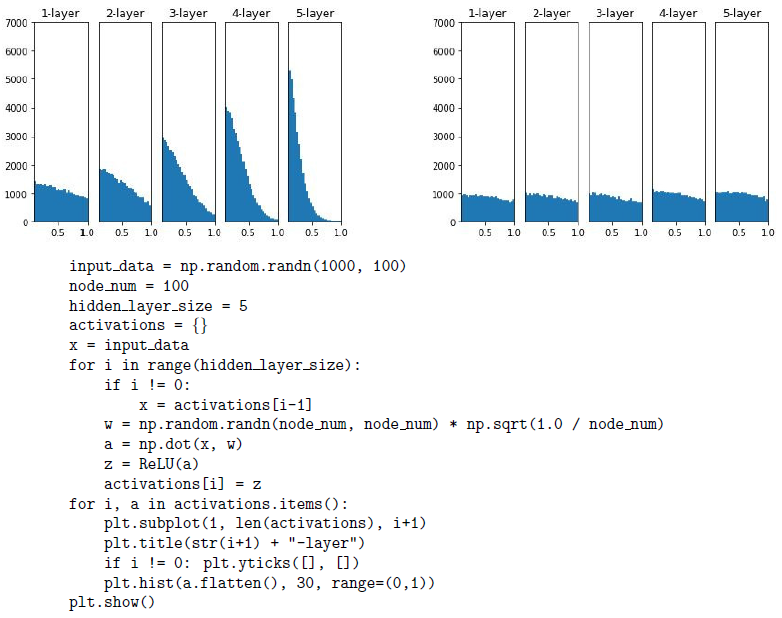

활성화함수로 ReLu를 사용하는데 Xavier 초기값 `np.sqrt(1.0 / node_num)`을 사용하므로 층이 진행될수록 신호 분호가 왼쪽으로 치우칩니다.  
He 초기값을 사용하도록 `np.sqrt(2.0 / node_num)`로 변경합니다.

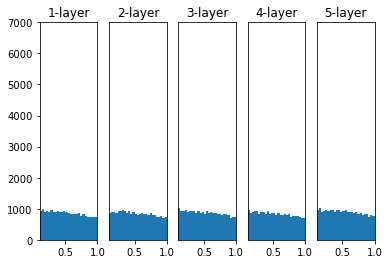

In [2]:
def ReLU(x):
    return np.maximum(0, x)

input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

**4. 활성화 함수를 시그모이드 함수로 사용하는 10층 신경망에서 가중치를 표준정규분포를 따라 초기화하였다. 다음 그림은 신경망에 데이터를 입력했을때 활성화층 출력값들의 히스토그램이다. 이후 다량의 데이터를 입력하여 여러번 학습을 시도하여도 낮은 층으로 내려갈수로 가중치와 편향이 제대로 학습이 되지 않았다. 그 이유를 수학적으로 설명하시오.**
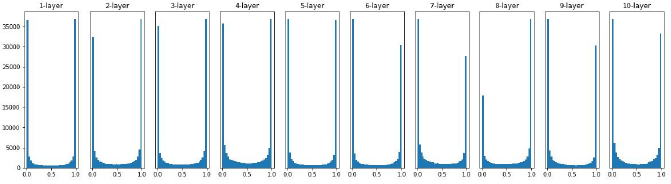

시그모이드층의 출력값은 0과 1사이인데 양 극단인 0과 1에 신호가 집중되어 있습니다.  
그래프를 보면 대부분의 신호에서 접선의 기울기가 매우 작습니다.  
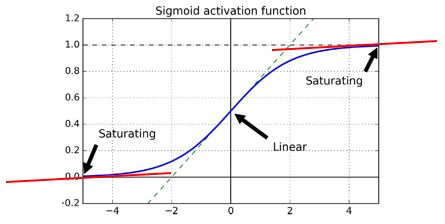
역전파는 마지막층부터 Affine층과 시그모이드층을 번갈아 가며 진행해 갑니다.  
시그모이드층에 흘러들어온 미분에 시그모이드층의 미분을 곱합니다.  
시그모이드층의 미분값이 작기 때문에 역전파가 진행될수록 작은 수를 여러번 곱하게 되어 그레디언트는 0에 가까워집니다.  
경사하강법을 통해 가중치와 편향을 업데이트하는데 보폭은 학습률 곱하기 그레디언트의 크기입니다.  
아래층으로 갈수록 그레디언트의 크기가 너무 작아져서 업데이트가 미미한 정도만 일어납니다.  
이때문에 아래층으로 갈수록 가중치와 편향이 제대로 학습이 되지 않습니다.
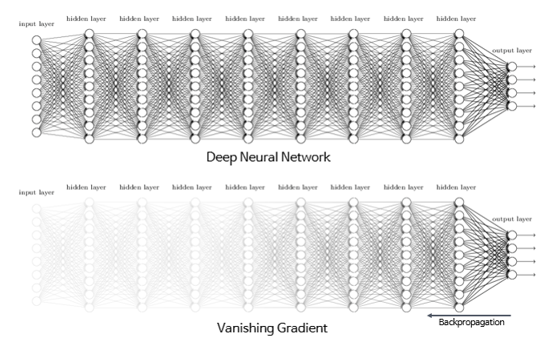